In [1]:
%load_ext autoreload
%autoreload 2
from system.bio_model.cognitive_map import LifelongCognitiveMap
import system.plotting.plotResults as plot

## Displaying different maps

In [2]:
def draw_map(file, env_model):
    cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=file, debug=False)
    print(f"{file} ({len(cognitive_map.node_network.nodes)} nodes)")
    plot.plotTrajectoryInEnvironment(env_model=env_model, cognitive_map=cognitive_map, trajectory=False)

cognitive_map_partial_2.gpickle (97 nodes)


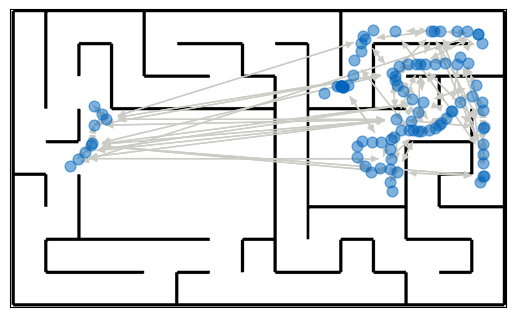

disjoint.gpickle (201 nodes)


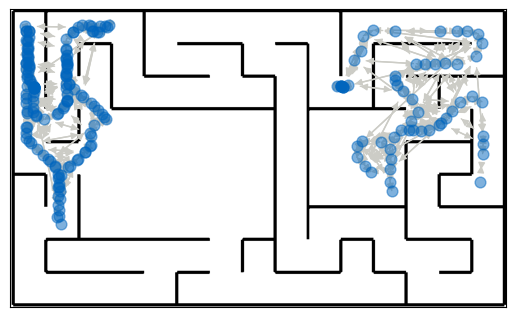

handcrafted.gpickle (99 nodes)


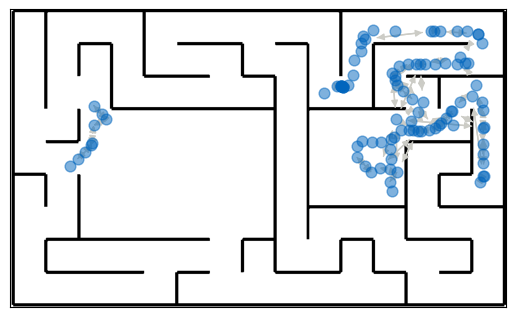

after_lifelong_learning.gpickle (98 nodes)


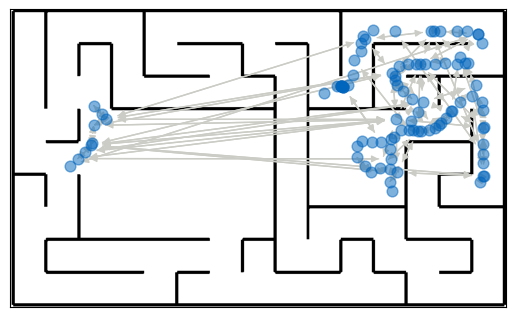

cognitive_map_full.gpickle (102 nodes)


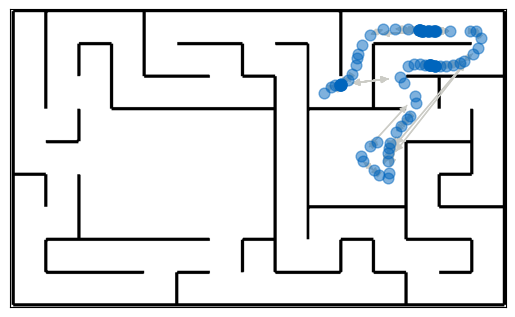

after_exploration.gpickle (77 nodes)


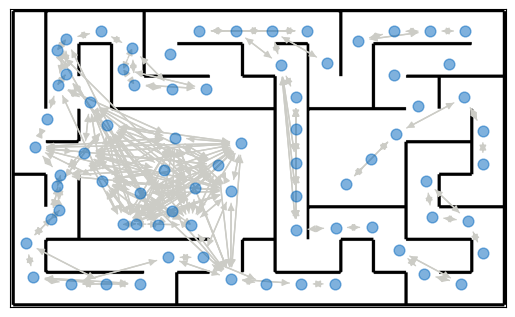

cognitive_map_partial.gpickle (60 nodes)


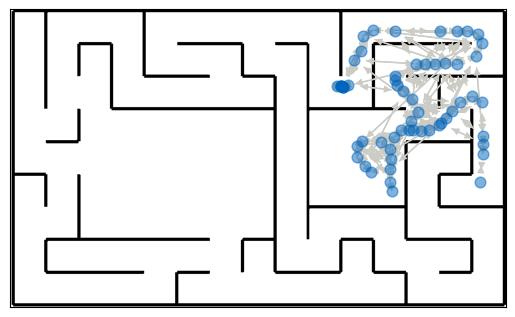

linear_sunburst.after_exploration+re--network.gpickle (27 nodes)


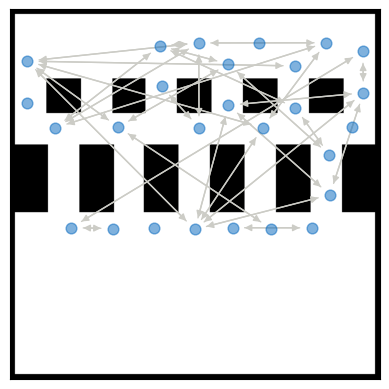

linear_sunburst.after_exploration.gpickle (18 nodes)


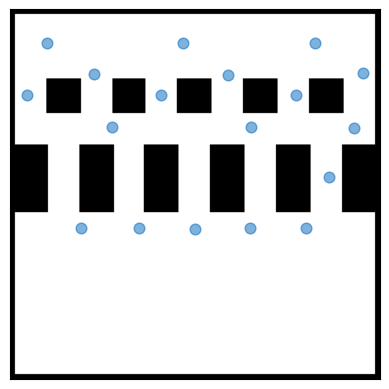

cognitive_map_partial_3.gpickle (141 nodes)


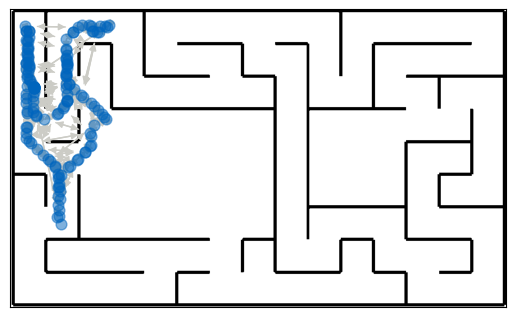

In [3]:
for filename in os.listdir("../system/bio_model/data/cognitive_map"):
    match filename.split("."):
        case (env_model, _type, "gpickle"):
            draw_map(filename, env_model)
        case (type, "gpickle"):
            draw_map(filename, "Savinov_val3")

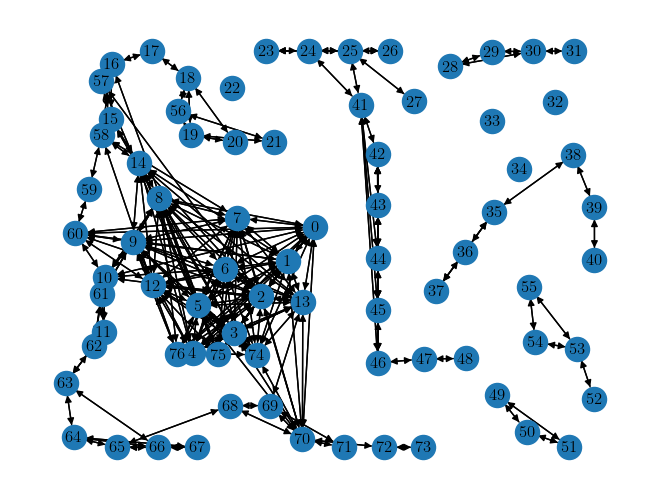

In [7]:
map_name = "after_exploration.gpickle"
map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=True)

## Computing grid cell drift

In [6]:
from system.controller.simulation.pybullet_environment import PybulletEnvironment
from system.controller.local_controller.local_navigation import setup_gc_network

map_file = 'after_exploration.gpickle'
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file)
with PybulletEnvironment(env_model="linear_sunburst") as env:
    gc_network = setup_gc_network(env.dt)
    cognitive_map.test_place_cell_network(env, gc_network)

Decoding goal vector to place Cell 0 out of 77


KeyboardInterrupt: 

## Getting reachability from map nodes

In [19]:
map_file = "after_exploration.gpickle"
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False)

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

node_network = cognitive_map.node_network
positions = { node: nodeval['pos'] for node, nodeval in node_network.nodes.items() }

def draw_network_with_re(re):
    reachabilities = []
    for start, end in node_network.edges:
        reachabilities.append(re.reachability_factor(start, end))
    nx.draw_networkx(node_network, node_size=120, with_labels=False, pos=positions, edge_color=reachabilities)
    plt.show()

from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory

##### Spikings

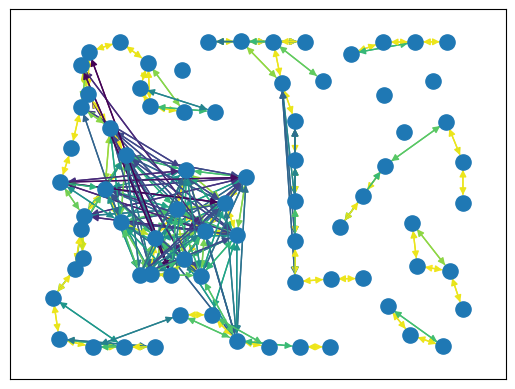

In [14]:
draw_network_with_re(reachability_estimator_factory('spikings'))

##### View_overlap

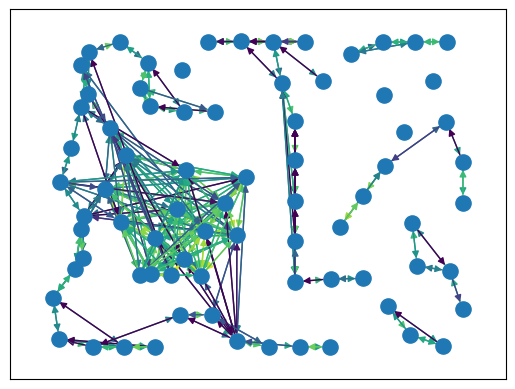

In [15]:
draw_network_with_re(reachability_estimator_factory('view_overlap'))

##### Network

In [20]:
!ls ../system/controller/reachability_estimator/data/models/

autoencoder0.25
autoencoder100.25
autoencoder1.25
autoencoder16.25
autoencoder20.25
autoencoder4.25
autoencoder50.10
autoencoder50.15
autoencoder50.20
autoencoder50.25
autoencoder50.5
autoencoder80.10
autoencoder80.15
autoencoder80.20
autoencoder80.25
autoencoder80.5
no_siamese_mse_updated.10
no_siamese_mse_updated.15
no_siamese_mse_updated.5
reachability_network-260624-3colors+lidar--ego_bc.25
reachability_network-260624-3colors+spikings+lidar--raw_lidar+conv.25
reachability_network-260624-boolor+spikings+lidar--raw_lidar+conv.25
reachability_network-260624+dist.25
reachability_network-260624+lidar--raw_lidar+conv.25
reachability_network-260624+spikings+conv.25
reachability_network-260624+spikings+lidar--allo_bc+conv.25
reachability_network-260624+spikings+lidar--ego_bc+conv.25
reachability_network-260624+spikings+lidar--raw_lidar.25
reachability_network-260624+spikings+lidar--raw_lidar+conv.25
reachability_network-260624+spikings+lidar--raw_lidar+dist+conv.25
reachability_network-260

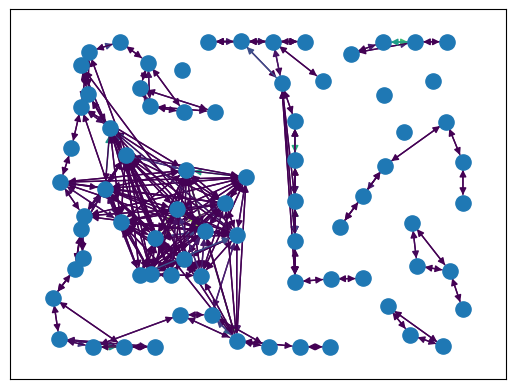

In [18]:
draw_network_with_re(reachability_estimator_factory(
    'neural_network',
    weights_file='re_mse_weights.50',
    config=SampleConfig(grid_cell_spikings=True)
))

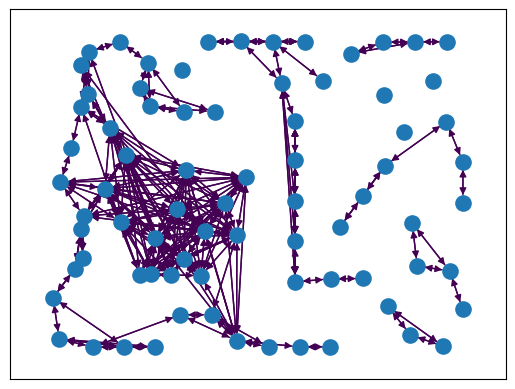

In [28]:
from system.controller.reachability_estimator.training.train_multiframe_dst import Hyperparameters

draw_network_with_re(reachability_estimator_factory(
    'neural_network',
    weights_file='reachability_network-260624+spikings+conv.25',
    config=SampleConfig(grid_cell_spikings=True),
    backbone_classname='convolutional',
))

### Checking where that reachability comes from

In [3]:
re.threshold_reachable

0.3

In [4]:
nodes = list(cognitive_map.node_network.nodes)
def get_factor(i, j):
    (node_i, node_j) = (nodes[x] for x in (i, j))
    re_factor = re.reachability_factor(node_i, node_j)
    try:
        saved_factor = cognitive_map.node_network.edges[node_i, node_j]['connectivity_probability']
    except KeyError:
        saved_factor = None
    return re_factor, saved_factor
get_factor(0, 1)

(0.7150000000000001, 0.7150000000000001)

In [6]:
from itertools import pairwise
for i, j in pairwise(range(len(nodes))):
    print(f'[{i}] -> [{j}]:', get_factor(i, j), get_factor(j, i))

[0] -> [1]: (0.7150000000000001, 0.7150000000000001) (0.7849999999999999, 0.7150000000000001)
[1] -> [2]: (0.75, 0.75) (0.75, 0.75)
[2] -> [3]: (0.745, 0.745) (0.775, 0.745)
[3] -> [4]: (0.635, 0.635) (0.815, 0.635)
[4] -> [5]: (0.7050000000000001, 0.7050000000000001) (0.69, 0.7050000000000001)
[5] -> [6]: (0.7849999999999999, 0.7849999999999999) (0.76, 0.7849999999999999)
[6] -> [7]: (0.77, 0.77) (0.71, 0.77)
[7] -> [8]: (0.36, 0.36) (0.66, 0.36)
[8] -> [9]: (0.59, 0.59) (0.515, 0.59)
[9] -> [10]: (0.36, 0.36) (0.435, 0.36)
[10] -> [11]: (0.305, 0.305) (0.27, 0.305)
[11] -> [12]: (0.0, None) (0.025, None)
[12] -> [13]: (0.62, 0.62) (0.445, 0.62)
[13] -> [14]: (0.505, 0.505) (0.22, 0.505)
[14] -> [15]: (0.66, 0.66) (0.195, 0.66)
[15] -> [16]: (0.42, 0.42) (0.43500000000000005, 0.42)
[16] -> [17]: (0.6950000000000001, 0.6950000000000001) (0.3, 0.6950000000000001)
[17] -> [18]: (0.32, 0.32) (0.505, 0.32)
[18] -> [19]: (0.61, 0.61) (0.56, 0.61)
[19] -> [20]: (0.47, 0.47) (0.61, 0.47)
[20]

#### Some more stats
to debug if the reachability does not make sense

In [17]:
import numpy as np
from system.controller.reachability_estimator.types import PlaceInfo
for i, j in pairwise(range(18)):
    node_i, node_j = nodes[i], nodes[j]
    middle = (node_i.pos + node_j.pos) / 2
    node_ij = PlaceInfo(pos=middle, angle=0, lidar=None, img=None, spikings=None)
    print(f'[{i}] -({re.reachability_factor(node_i, node_ij)})> [{i}.5] -({re.reachability_factor(node_ij, node_j)})> [{j}]')

[0] -(-0.8302635584928693)> [0.5] -(-0.8302635584928697)> [1]
[1] -(-0.8568140175843595)> [1.5] -(-0.8568140175843598)> [2]
[2] -(-2.501533277732558)> [2.5] -(-2.501533277732558)> [3]
[3] -(-0.8467862963514505)> [3.5] -(-0.8467862963514505)> [4]
[4] -(-0.827746202734712)> [4.5] -(-0.827746202734712)> [5]
[5] -(-0.8223541891237505)> [5.5] -(-0.8223541891237497)> [6]
[6] -(-0.8186241225164983)> [6.5] -(-0.8186241225164983)> [7]
[7] -(-0.8473762745932515)> [7.5] -(-0.8473762745932509)> [8]
[8] -(-0.829908450745501)> [8.5] -(-0.8299084507455005)> [9]
[9] -(-0.8125709565277949)> [9.5] -(-0.8125709565277955)> [10]
[10] -(-0.8464369468644735)> [10.5] -(-0.8464369468644719)> [11]
[11] -(-0.8358955536418636)> [11.5] -(-0.835895553641863)> [12]
[12] -(-0.8446180989758892)> [12.5] -(-0.8446180989758892)> [13]
[13] -(-0.8711103234405992)> [13.5] -(-0.8711103234405992)> [14]
[14] -(-0.8279291257838153)> [14.5] -(-0.8279291257838153)> [15]
[15] -(-0.8419868739424984)> [15.5] -(-0.8419868739424973)> 

# Merging maps

In [2]:
map_files = "cognitive_map_partial", "cognitive_map_partial_3"
map_files = [ file + ".gpickle" for file in map_files ]
maps = [ LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False) for map_file in map_files ]

In [3]:
for i, map in enumerate(maps):
    print("Edge for map", i)
    edge = next(iter(map.node_network.edges))
    print(map.node_network.edges[edge])

Edge for map 0
{'weight': 0.0574221613648944, 'connectivity_probability': 0.95, 'mu': 0.05960367940133437, 'sigma': 0.005669467095138408}
Edge for map 1
{'weight': 0.1723835877321686, 'connectivity_probability': 0.9377825618945104, 'mu': 0.16670678766968194, 'sigma': 0.008660254037844387, 'length': 107}


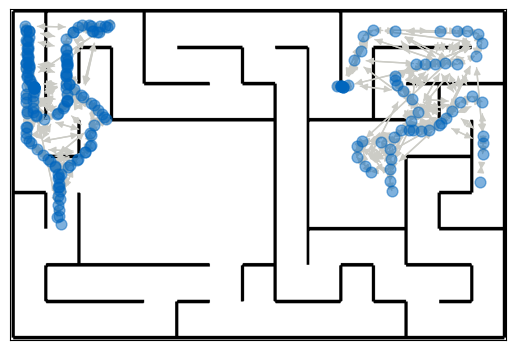

In [10]:
import networkx
new_map = LifelongCognitiveMap(reachability_estimator=None, debug=False)
new_graph = new_map.node_network
for map in maps:
    for node in map.node_network:
        new_graph.add_node(node, pos=node.pos)
    new_graph.add_edges_from(((*edge_start_and_end, edge) for (edge_start_and_end, edge) in map.node_network.edges.items()))
plot.plotTrajectoryInEnvironment(env_model="Savinov_val3", cognitive_map=new_map, trajectory=False)

In [12]:
new_map.save("disjoint.gpickle")